Analysis:
1. CBS had the most flucuation in their Vader Sentiment score. While BBC, CNN, Fox News, and New York Times were negative, the tweets from CBS would alternate from positive to negative. This can be seen when plotting the compound scores for just CBS - there is an evener distribution of points than for the other media sources.
2. BBC World news was consistently the most negative of the media sources.
3. The tweets that had a Vader Sentiment compound score of 0 appeared in clumps together for each individual media source. We can conclude that the news to be reported at these time periods was not something that would have a large impact.

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import time
from config import consumer_key,consumer_secret,access_token,access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# List Declaration
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_account = []
tweets_ago = []
text = []
date = []



#targeted tweets
target_search = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
#colors = ["Yellow", "Blue", "Green", "Coral", "LightBlue"]


for target in target_search:
    tweet_count = 0
    for x in range(5):
        
        public_tweets = api.user_timeline(target)

        for tweet in public_tweets:
            tweet_count = tweet_count + 1

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            
            user_account.append(target)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(tweet_count)
            text.append(tweet['text'])
            date.append(tweet['created_at'])


social_data_pd = pd.DataFrame({"User": user_account, "Compound Point": compound_list, "Positive Point": positive_list, 
                               "Neutral Point": neutral_list, "Negative Point": negative_list, "Tweets Ago":tweets_ago , "Text":text, "Date Tweeted":date}, 
                                 columns=("User", "Text", "Date Tweeted", "Compound Point",  "Positive Point" ,"Neutral Point", "Negative Point", "Tweets Ago"))          

social_data_pd.head()

,User,Text,Date Tweeted,Compound Point,Positive Point,Neutral Point,Negative Point,Tweets Ago
0,@BBC,The Generation Game is back! Mel Giedroyc and ...,Sun Apr 01 18:00:27 +0000 2018,0.7644,0.248,0.752,0.0,1
1,@BBC,RT @BBCSport: Happy April Fool's Day everyone!...,Sun Apr 01 17:42:22 +0000 2018,0.6114,0.363,0.637,0.0,2
2,@BBC,🤖 Who'd love their next takeaway to be deliver...,Sun Apr 01 17:00:26 +0000 2018,0.6369,0.296,0.704,0.0,3
3,@BBC,🐰 You only need one piece of paper to make thi...,Sun Apr 01 16:03:03 +0000 2018,0.0000,0.000,1.000,0.0,4
4,@BBC,What is it like to grow up with HIV? Three tee...,Sun Apr 01 15:00:26 +0000 2018,0.5719,0.266,0.734,0.0,5


In [3]:
#Exporting Data to csv file
social_data_pd.to_csv("sentiment analysis.csv", index = False)

In [4]:
# Creating individual datasets to create the plots
bbc_data = social_data_pd.loc[social_data_pd["User"] == "@BBC",:]
cbs_data = social_data_pd.loc[social_data_pd["User"] == "@CBS",:]
cnn_data = social_data_pd.loc[social_data_pd["User"] == "@CNN",:]
fox_data = social_data_pd.loc[social_data_pd["User"] == "@FoxNews",:]
nytimes_data = social_data_pd.loc[social_data_pd["User"] == "@nytimes",:]

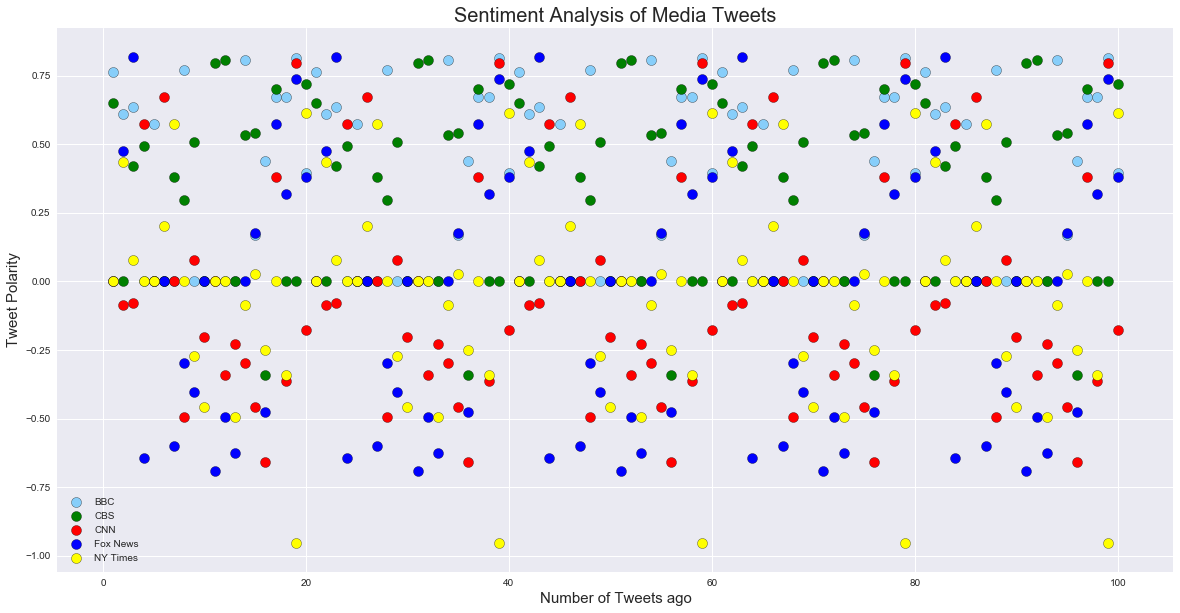

In [5]:
# Now creating the code for different charts

sns.set()
main_plot = bbc_data.plot(kind='scatter', x= 'Tweets Ago',y= "Compound Point", color = "lightskyblue",edgecolors="black", 
                         grid=True,  figsize=(20,10), legend = True, label = "BBC", s = 100)                                           

cbs_data.plot(kind = 'scatter',x= 'Tweets Ago',y= "Compound Point", color = "green",edgecolors="black", 
                         grid=True,  figsize=(20,10),legend = True, label = "CBS", s = 100, ax = main_plot )  
                         
cnn_data.plot(kind = 'scatter',x= 'Tweets Ago', y= "Compound Point", color = "red",edgecolors="black", 
                         grid=True,  figsize=(20,10), legend = True, label = "CNN", s = 100, ax = main_plot )
                         
fox_data.plot(kind = 'scatter',x= 'Tweets Ago',y= "Compound Point", color = "blue",edgecolors="black", 
                         grid=True,  figsize=(20,10), legend = True, label = "Fox News", s = 100, ax = main_plot ) 
                         
nytimes_data.plot(kind = 'scatter',x= 'Tweets Ago', y= "Compound Point", color = "yellow",edgecolors="black", 
                         grid=True,  figsize=(20,10),  legend = True, label = "NY Times", s =100, ax = main_plot )


# Printing the labels and titles with their respective font sizes
plt.xlabel('Number of Tweets ago', fontsize = 15)
plt.ylabel("Tweet Polarity", fontsize = 15)
plt.title("Sentiment Analysis of Media Tweets", fontsize = 20)

# Saving and Showing the plot
plt.savefig("Sentiment_Analysis_of_Tweets.png", bbox_inches="tight")
plt.show()

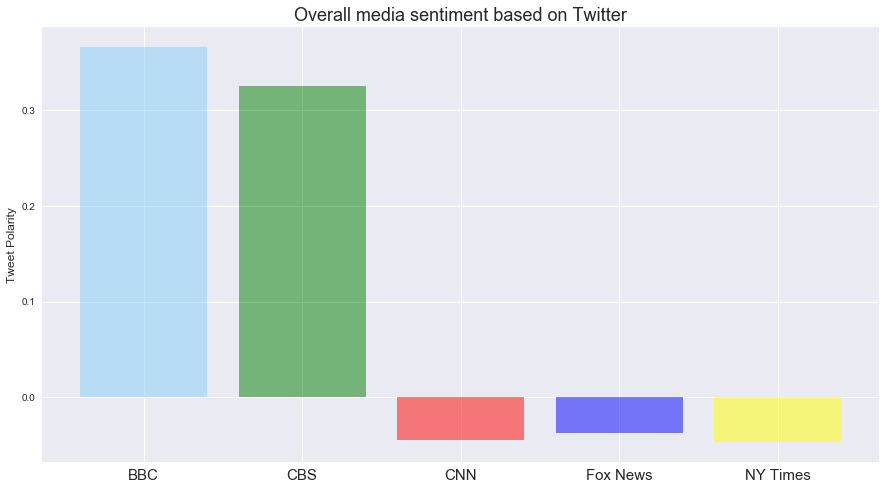

In [7]:
# Now creating the code for the bar chart

bbc_data_avg = bbc_data["Compound Point"].mean()
cbs_data_avg = cbs_data["Compound Point"].mean()
cnn_data_avg = cnn_data["Compound Point"].mean()
fox_data_avg = fox_data["Compound Point"].mean()
nytimes_data_avg = nytimes_data["Compound Point"].mean()

channels = [bbc_data_avg, cbs_data_avg, cnn_data_avg, fox_data_avg,nytimes_data_avg]
x_axis = np.arange(len(channels))

# Tell matplotlib that we will be making a bar chart
# Channels is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks, and we assign respective colors
plt.bar(x_axis, channels, color=['lightskyblue', 'green', 'red', 'blue', 'yellow'], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox News", "NY Times"], fontsize = 15)

# Give our chart Y Label and Title
plt.title("Overall media sentiment based on Twitter", fontsize = 18)
plt.ylabel("Tweet Polarity", fontsize = 12)

# Code for increasing fig size for prettier looks :)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


# Saving and Showing the plot
plt.savefig("Overall_Media_Sentiment.png")
plt.show()
